In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from wwo_hist import retrieve_hist_data
import os
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import datetime
from sklearn import preprocessing
from scipy import stats

bikeday = pd.read_csv('day.csv')
bikehour = pd.read_csv('hour.csv')

In [2]:
hdf = bikehour.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'is_workday', 'hum': 'humidity', 'cnt': 'users_total', 'holiday': 'is_holiday', 'atemp': 'felt_temperature', 'temp': 'temperature', 'weathersit': 'weather', 'casual': 'casual_users', 'registered': 'registered_users'})

In [3]:
hdf['season'] = hdf['season'].replace([1, 2, 3, 4], ['winter', 'spring', 'summer', 'fall'])
hdf['year'] = hdf['year'].replace([0, 1], [2011, 2012])
hdf['weekday'] = hdf['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
hdf['month'] = hdf['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#hdf['weather'] = hdf['weather'].replace([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
hdf['is_holiday'] = hdf['is_holiday'].replace([1, 0], [True, False])
hdf['is_workday'] = hdf['is_workday'].replace([1, 0], [True, False])
hdf['is_weekend'] = np.where((hdf['weekday'] == 'Saturday') | (hdf['weekday'] == 'Sunday'), True, False)
hdf.season = hdf.season.astype('category')
hdf.month = hdf.month.astype('category')
hdf.weekday = hdf.weekday.astype('category')

In [ ]:
#Download weather data using wwo_hist (just for reference):
# frequency=1
#start_date = '01-JAN-2011'
#end_date = '31-DEC-2012'
#api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
#location_list = ['washington']

#hist_weather_data = retrieve_hist_data(api_key,
#                                location_list,
#                                start_date,
#                                end_date,
#                                frequency,
#                                location_label = False,
#                                export_csv = True,
#                                store_df = True) 

In [4]:
washdf = pd.read_csv("washington.csv")
washdf['date_time'] = washdf['date_time'].astype('datetime64')
wash_sel_df = washdf[['date_time', 'totalSnow_cm', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'visibility']]

In [5]:
scaler = MinMaxScaler() 

column_names_to_normalize = ['totalSnow_cm', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'visibility']
x = wash_sel_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
wash_norm = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = wash_sel_df.index)
wash_sel_df[column_names_to_normalize] = wash_norm

In [6]:
hdf['date'] = hdf['date'].astype('datetime64')
hdf['date_time'] = pd.to_datetime(hdf.date) + pd.to_timedelta(hdf.hour, unit='h')

In [7]:
hdf = hdf.drop(columns=['humidity'])

In [8]:
capital_df = pd.merge(hdf, wash_sel_df, on='date_time')

In [9]:
capital_df = capital_df.drop(columns=['date_time'])

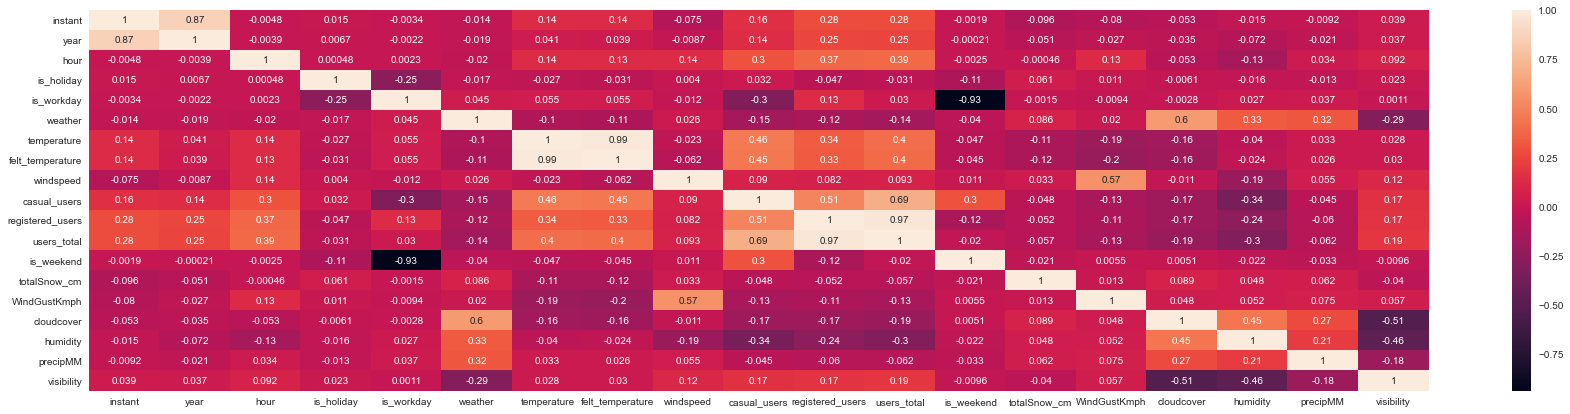

In [10]:
corr_mat = capital_df.corr()
plt.figure(figsize=(30,7))
sns.heatmap(corr_mat, annot = True)
#plt.savefig("correlation.png")
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

hdf_sel = hdf[['season','year','month','hour','weekday','weather','temperature','felt_temperature','windspeed','users_total']]
#hdf_sel = hdf[['season','year','month','hour','is_holiday','weekday','is_workday','weather','temperature','felt_temperature','windspeed','users_total','is_weekend']]
X = hdf_sel.drop(columns = ['users_total'])
y = hdf_sel['users_total']
#### split the dataset into train and test sets
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
## one-hot encode input variables
#onehot_encoder = OneHotEncoder()
#onehot_encoder.fit(X_train)
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)
X = pd.get_dummies(X)
#y = pd.get_dummies(y)
#y_test = pd.get_dummies(y_test)
# define the model
model = AdaBoostRegressor()
###We do not need to call the fit method separately while using cross validation, the cross_val_score method fits the data itself while implementing the cross-validation on data.
# fit on the training set
#model.fit(X_train, y_train)
## predict on test set
#yhat = model.predict(X_test)
## evaluate predictions
#accuracy = accuracy_score(y_test, yhat)
#print('Accuracy: %.2f' % (accuracy*100))
score = cross_val_predict(model, X, y, cv=10)
#accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=10)
#accuracy = cross_val_score(model, X, y, scoring='explained_variance', cv=10)
print(score)
#get the mean of each fold 
# All scorer objects follow the convention that higher return values are better than lower return values.
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[ 60.73099415  60.73099415  60.73099415 ... 190.13026445 190.13026445
 190.13026445]


In [25]:
capital_df_sel = capital_df[['windspeed','totalSnow_cm' ,'WindGustKmph','cloudcover','humidity','precipMM','visibility','season','year','month','hour','weekday','weather','temperature','felt_temperature','windspeed','users_total']]

X = capital_df_sel.drop(columns = ['users_total'])
y = capital_df_sel['users_total']

X = pd.get_dummies(X)
#y = pd.get_dummies(y)

model = AdaBoostRegressor()
#accuracy = cross_val_score(model, X, y, scoring='explained_variance', cv=10)
score = cross_val_score(model, X, y, cv=10)
print(score)
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[-2.42229338  0.42623662  0.51221407  0.42864713  0.33418557  0.06321305
  0.65172549  0.47763689  0.59987425  0.51790918]
Accuracy of Model with Cross Validation is: 15.89348871752953


In [26]:
hdf_sel

,season,year,month,hour,weekday,weather,temperature,felt_temperature,windspeed,users_total
0,winter,2011,January,0,Saturday,1,0.24,0.2879,0.0000,16
1,winter,2011,January,1,Saturday,1,0.22,0.2727,0.0000,40
2,winter,2011,January,2,Saturday,1,0.22,0.2727,0.0000,32
3,winter,2011,January,3,Saturday,1,0.24,0.2879,0.0000,13
4,winter,2011,January,4,Saturday,1,0.24,0.2879,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,winter,2012,December,19,Monday,2,0.26,0.2576,0.1642,119
17375,winter,2012,December,20,Monday,2,0.26,0.2576,0.1642,89
17376,winter,2012,December,21,Monday,1,0.26,0.2576,0.1642,90
17377,winter,2012,December,22,Monday,1,0.26,0.2727,0.1343,61


In [27]:
capital_df_sel

,windspeed,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility,season,year,month,hour,weekday,weather,temperature,felt_temperature,windspeed,users_total
0,0.0000,0.0,0.148649,1.00,0.985714,0.000000,0.0,winter,2011,January,0,Saturday,1,0.24,0.2879,0.0000,16
1,0.0000,0.0,0.189189,1.00,0.985714,0.000000,0.0,winter,2011,January,1,Saturday,1,0.22,0.2727,0.0000,40
2,0.0000,0.0,0.229730,1.00,0.985714,0.000000,0.0,winter,2011,January,2,Saturday,1,0.22,0.2727,0.0000,32
3,0.0000,0.0,0.283784,1.00,0.985714,0.000000,0.0,winter,2011,January,3,Saturday,1,0.24,0.2879,0.0000,13
4,0.0000,0.0,0.256757,0.89,0.985714,0.000000,0.3,winter,2011,January,4,Saturday,1,0.24,0.2879,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.1642,0.0,0.283784,0.51,0.671429,0.003788,0.7,winter,2012,December,19,Monday,2,0.26,0.2576,0.1642,119
17375,0.1642,0.0,0.324324,0.43,0.685714,0.000000,0.8,winter,2012,December,20,Monday,2,0.26,0.2576,0.1642,89
17376,0.1642,0.0,0.351351,0.35,0.685714,0.000000,1.0,winter,2012,December,21,Monday,1,0.26,0.2576,0.1642,90
17377,0.1343,0.0,0.297297,0.29,0.685714,0.000000,1.0,winter,2012,December,22,Monday,1,0.26,0.2727,0.1343,61


In [44]:
ddf = bikeday.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'is_workday', 'hum': 'humidity', 'cnt': 'users_total', 'holiday': 'is_holiday', 'atemp': 'felt_temperature', 'temp': 'temperature', 'weathersit': 'weather', 'casual': 'casual_users', 'registered': 'registered_users'})
ddf['season'] = ddf['season'].replace([1, 2, 3, 4], ['winter', 'spring', 'summer', 'fall'])
ddf['year'] = ddf['year'].replace([0, 1], [2011, 2012])
ddf['weekday'] = ddf['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ddf['month'] = ddf['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#ddf['weather'] = hdf['weather'].replace([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
ddf['is_holiday'] = hdf['is_holiday'].replace([1, 0], [True, False])
ddf['is_workday'] = hdf['is_workday'].replace([1, 0], [True, False])
ddf['date'] = ddf['date'].astype('datetime64')
ddf['is_weekend'] = np.where((ddf['weekday'] == 'Saturday') | (ddf['weekday'] == 'Sunday'), True, False)
ddf.season = ddf.season.astype('category')
ddf.month = ddf.month.astype('category')
ddf.weekday = ddf.weekday.astype('category')

In [45]:
ddf = ddf.rename(columns={'date': 'date_time'})

In [46]:
ddf = ddf.drop(columns=['humidity'])

In [61]:
##os.mkdir('daily')
##os.chdir('daily')

#frequency=24
#start_date = '01-JAN-2011'
#end_date = '31-DEC-2012'
#api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
#location_list = ['washington']

#hist_weather_data = retrieve_hist_data(api_key,
#                                location_list,
#                                start_date,
#                                end_date,
#                                frequency,
#                                location_label = False,
#                                export_csv = True,
#                                store_df = True)



Retrieving weather data for washington


Currently retrieving data for washington: from 2011-01-01 to 2011-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.767155
Currently retrieving data for washington: from 2011-02-01 to 2011-02-28
Time elapsed (hh:mm:ss.ms) 0:00:03.495881
Currently retrieving data for washington: from 2011-03-01 to 2011-03-31
Time elapsed (hh:mm:ss.ms) 0:00:05.465034
Currently retrieving data for washington: from 2011-04-01 to 2011-04-30
Time elapsed (hh:mm:ss.ms) 0:00:08.069288
Currently retrieving data for washington: from 2011-05-01 to 2011-05-31
Time elapsed (hh:mm:ss.ms) 0:00:09.802981
Currently retrieving data for washington: from 2011-06-01 to 2011-06-30
Time elapsed (hh:mm:ss.ms) 0:00:12.650106
Currently retrieving data for washington: from 2011-07-01 to 2011-07-31
Time elapsed (hh:mm:ss.ms) 0:00:15.190601
Currently retrieving data for washington: from 2011-08-01 to 2011-08-31
Time elapsed (hh:mm:ss.ms) 0:00:17.306533
Currently retrieving data for washington: fro

In [47]:
washdf_d = pd.read_csv("daily\\washington.csv")
washdf_d['date_time'] = washdf_d['date_time'].astype('datetime64')
wash_sel_d_df = washdf_d[['date_time', 'totalSnow_cm', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'visibility']]

In [48]:
scaler = MinMaxScaler() 

column_names_to_normalize = ['totalSnow_cm', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'visibility']
x = wash_sel_d_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
wash_norm_d = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = wash_sel_d_df.index)
wash_sel_d_df[column_names_to_normalize] = wash_norm_d

In [49]:
capital_d_df = pd.merge(ddf, wash_sel_d_df, on='date_time')

In [21]:
capital_d_df

,instant,date_time,season,year,month,is_holiday,weekday,is_workday,weather,temperature,...,casual_users,registered_users,users_total,is_weekend,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility
0,1,2011-01-01,winter,2011,January,False,Saturday,False,A,0.344167,...,331,654,985,True,0.0,0.409091,0.90,0.983051,0.013921,0.555556
1,2,2011-01-02,winter,2011,January,False,Sunday,False,A,0.363478,...,131,670,801,True,0.0,0.409091,0.74,0.881356,0.051624,0.666667
2,3,2011-01-03,winter,2011,January,False,Monday,False,A,0.196364,...,120,1229,1349,False,0.0,0.250000,0.03,0.254237,0.000000,1.000000
3,4,2011-01-04,winter,2011,January,False,Tuesday,False,A,0.200000,...,108,1454,1562,False,0.0,0.295455,0.10,0.406780,0.000000,1.000000
4,5,2011-01-05,winter,2011,January,False,Wednesday,False,A,0.226957,...,82,1518,1600,False,0.0,0.204545,0.16,0.474576,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,2012,December,False,Thursday,True,A,0.254167,...,247,1867,2114,False,0.0,0.704545,0.28,0.677966,0.004060,1.000000
727,728,2012-12-28,winter,2012,December,False,Friday,True,A,0.253333,...,644,2451,3095,False,0.0,0.181818,0.25,0.644068,0.000000,1.000000
728,729,2012-12-29,winter,2012,December,False,Saturday,True,A,0.253333,...,159,1182,1341,True,0.0,0.295455,0.68,0.813559,0.015661,0.777778
729,730,2012-12-30,winter,2012,December,False,Sunday,True,A,0.255833,...,364,1432,1796,True,0.0,0.613636,0.10,0.593220,0.000000,1.000000


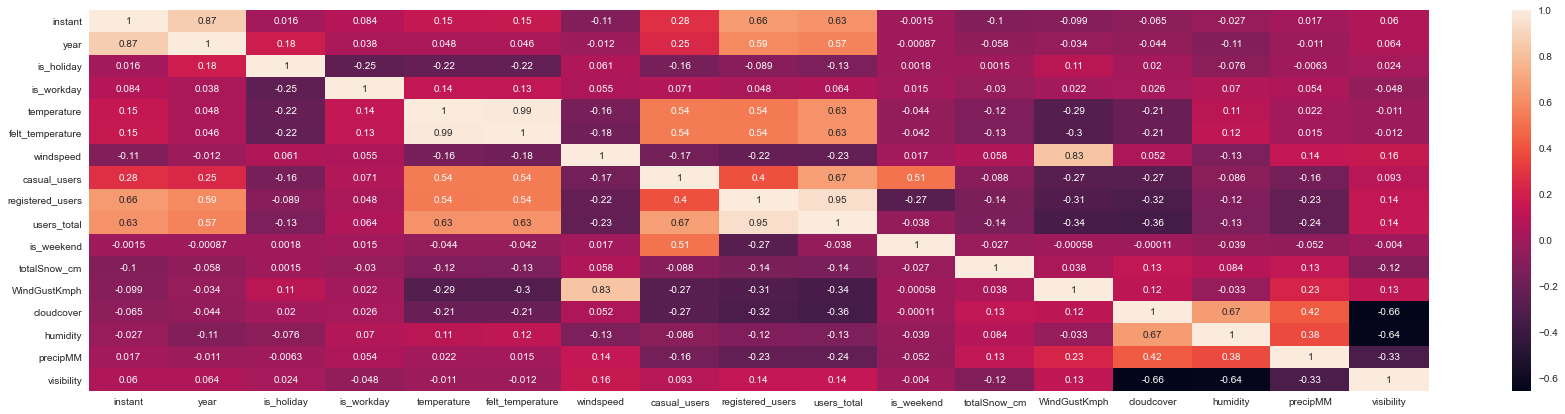

In [22]:
corr_mat_d = capital_d_df.corr()
plt.figure(figsize=(30,7))
sns.heatmap(corr_mat_d, annot = True)
#plt.savefig("correlation.png")
plt.show()

<AxesSubplot:>

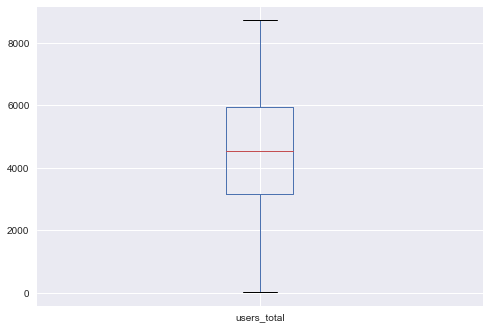

In [113]:
capital_d_df.users_total.plot.box()

<AxesSubplot:>

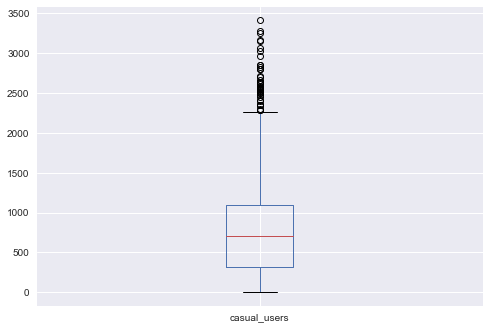

In [114]:
capital_d_df.casual_users.plot.box()

In [116]:
capital_d_df['casual_users'].sum()

620017

In [117]:
capital_d_df['registered_users'].sum()

2672662

In [23]:
capital_d_df.loc[capital_d_df['casual_users'] > 2300]

,instant,date_time,season,year,month,is_holiday,weekday,is_workday,weather,temperature,...,casual_users,registered_users,users_total,is_weekend,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility
148,149,2011-05-29,spring,2011,May,False,Sunday,True,B,0.667500,...,2355,2433,4788,True,0.0,0.159091,0.44,0.762712,0.000580,0.666667
184,185,2011-07-04,summer,2011,July,False,Monday,False,A,0.726667,...,3065,2978,6043,False,0.0,0.136364,0.25,0.610169,0.002900,0.888889
196,197,2011-07-16,summer,2011,July,False,Saturday,False,A,0.686667,...,2418,3505,5923,True,0.0,0.204545,0.05,0.559322,0.000000,0.888889
246,247,2011-09-04,summer,2011,September,False,Sunday,True,B,0.709167,...,2521,2419,4940,True,0.0,0.272727,0.29,0.745763,0.001740,0.777778
281,282,2011-10-09,fall,2011,October,False,Sunday,True,A,0.540833,...,2397,3114,5511,True,0.0,0.000000,0.01,0.576271,0.000000,1.000000
441,442,2012-03-17,winter,2012,March,False,Saturday,True,A,0.514167,...,3155,4681,7836,True,0.0,0.159091,0.29,0.796610,0.008121,0.888889
447,448,2012-03-23,spring,2012,March,False,Friday,True,B,0.601667,...,2469,5893,8362,False,0.0,0.159091,0.10,0.711864,0.010441,0.666667
455,456,2012-03-31,spring,2012,March,False,Saturday,True,B,0.424167,...,2301,3934,6235,True,0.0,0.250000,0.69,0.779661,0.011601,0.888889
456,457,2012-04-01,spring,2012,April,False,Sunday,True,B,0.425833,...,2347,3694,6041,True,0.0,0.136364,0.45,0.711864,0.017401,0.888889
462,463,2012-04-07,spring,2012,April,False,Saturday,True,A,0.437500,...,3252,3605,6857,True,0.0,0.363636,0.00,0.186441,0.000000,1.000000


<AxesSubplot:>

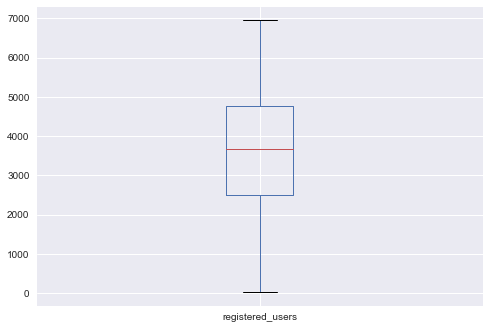

In [115]:
capital_d_df.registered_users.plot.box()

In [ ]:
enc_ddf = pd.get_dummies(ddf)

xd = enc_ddf.drop(columns = ['users_total', 'registered_users', 'casual_users'])
yd = enc_ddf['users_total']

ada = AdaBoostRegressor()
ada.fit(xd,yd)

In [ ]:
enc_d_cap = pd.get_dummies(capital_d_df)

xxd = enc_cap.drop(columns = ['users_total', 'registered_users', 'casual_users'])
yyd = enc_cap['users_total']

ada = AdaBoostRegressor()
ada.fit(xxd,yyd)